In [238]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [239]:
train = pd.read_csv('train.csv')

In [240]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [241]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [242]:
train = train.drop(['PassengerId','Name','Cabin'], axis = 1)

In [243]:
test = test.drop(['PassengerId','Name','Cabin'], axis = 1)

In [244]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [245]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [246]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [247]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [248]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [249]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [250]:
x = train.drop('Transported', axis = 1)
y = train.Transported

In [251]:
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
xtr = LabelEncoder()

In [254]:
x['CryoSleep'] = xtr.fit_transform(x.CryoSleep)
x['VIP'] = xtr.fit_transform(x.VIP)
y = xtr.fit_transform(y)

test['CryoSleep'] = xtr.fit_transform(test.CryoSleep)
test['VIP'] = xtr.fit_transform(test.VIP)

In [255]:
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [256]:
y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [257]:
dm_list = ['HomePlanet','Destination']

In [258]:
def df_dummy(df,dm_list):
    for i in dm_list:
        dummies = pd.get_dummies(df[i], prefix = i)
        df = df.drop(i,1)
        df = pd.concat([df,dummies], axis = 1)
    return df

In [259]:
x = df_dummy(x,dm_list)

C:\Users\saimi\AppData\Local\Temp\ipykernel_9884\2333673186.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\saimi\AppData\Local\Temp\ipykernel_9884\2333673186.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)


In [260]:
test = df_dummy(test,dm_list)

C:\Users\saimi\AppData\Local\Temp\ipykernel_9884\2333673186.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\saimi\AppData\Local\Temp\ipykernel_9884\2333673186.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)


In [261]:
x

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,0


In [262]:
from sklearn.impute import SimpleImputer

In [263]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

imputer.fit(x)
x = pd.DataFrame(data = imputer.transform(x), columns = x.columns)

In [264]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

imputer.fit(test)
test = pd.DataFrame(data = imputer.transform(test), columns = test.columns)

In [265]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   HomePlanet_Earth           8693 non-null   float64
 9   HomePlanet_Europa          8693 non-null   float64
 10  HomePlanet_Mars            8693 non-null   float64
 11  Destination_55 Cancri e    8693 non-null   float64
 12  Destination_PSO J318.5-22  8693 non-null   float64
 13  Destination_TRAPPIST-1e    8693 non-null   float

In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   float64
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   float64
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_Earth           4277 non-null   float64
 9   HomePlanet_Europa          4277 non-null   float64
 10  HomePlanet_Mars            4277 non-null   float64
 11  Destination_55 Cancri e    4277 non-null   float64
 12  Destination_PSO J318.5-22  4277 non-null   float64
 13  Destination_TRAPPIST-1e    4277 non-null   float

In [267]:
x.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [268]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state = 1)

In [269]:
x_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
5776,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
220,0.0,43.0,0.0,0.0,888.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2398,0.0,24.0,0.0,19.0,676.0,0.0,26.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5876,0.0,16.0,0.0,0.0,0.0,60.0,0.0,1963.0,1.0,0.0,0.0,0.0,0.0,1.0
192,0.0,21.0,0.0,367.0,281.0,0.0,0.0,146.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,38.0,0.0,886.0,0.0,618.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7813,0.0,39.0,0.0,0.0,261.0,0.0,1831.0,1797.0,0.0,1.0,0.0,0.0,0.0,1.0
905,0.0,24.0,0.0,0.0,32.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5192,1.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [271]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [272]:
#Logistic Regression

lr = LogisticRegression()

In [273]:
lr.fit(x_train,y_train)

C:\Users\saimi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
ytrn_prd1 = lr.predict(x_train)
ytst_prd1 = lr.predict(x_test)

In [275]:
trn_acc1 = accuracy_score(ytrn_prd1,y_train)
trn_acc1*100

78.32901926948519

In [276]:
tst_acc1 = accuracy_score(ytst_prd1,y_test)
tst_acc1*100

79.58596894767108

In [277]:
print(classification_report(y_test,ytst_prd1))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       843
           1       0.79      0.83      0.81       896

    accuracy                           0.80      1739
   macro avg       0.80      0.79      0.80      1739
weighted avg       0.80      0.80      0.80      1739



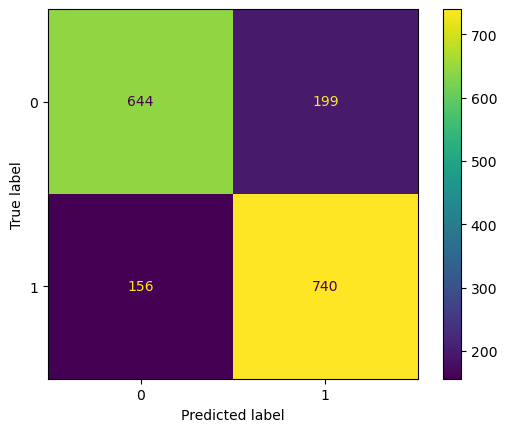

In [278]:
cm = confusion_matrix(y_test,ytst_prd1)
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp1.plot()
plt.show()

In [279]:
sv = SVC()

In [280]:
sv.fit(x_train,y_train)

SVC()

In [281]:
ytrn_prd2 = lr.predict(x_train)
ytst_prd2 = lr.predict(x_test)

In [282]:
trn_acc2 = accuracy_score(ytrn_prd2,y_train)
trn_acc2*100

78.32901926948519

In [283]:
tst_acc2 = accuracy_score(ytst_prd2,y_test)
tst_acc2*100

79.58596894767108

In [284]:
print(classification_report(y_test,ytst_prd2))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       843
           1       0.79      0.83      0.81       896

    accuracy                           0.80      1739
   macro avg       0.80      0.79      0.80      1739
weighted avg       0.80      0.80      0.80      1739



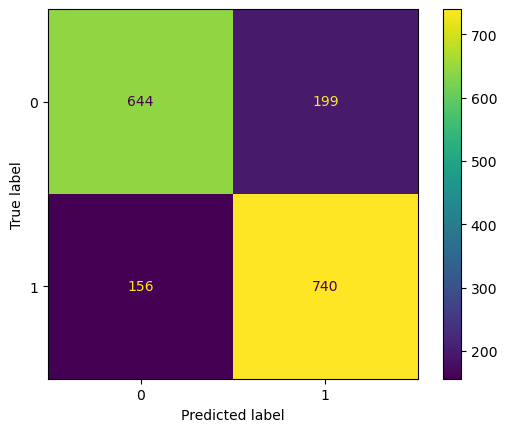

In [285]:
cm1 = confusion_matrix(y_test,ytst_prd2)
cm_disp2 = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_disp2.plot()
plt.show()

In [286]:
#final


leg = LogisticRegression()

In [287]:
leg.fit(x,y)

C:\Users\saimi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [288]:
yprd = leg.predict(test)

In [289]:
yprd

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [290]:
len(yprd)

4277

In [291]:
sub = pd.read_csv('sample_submission.csv')
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [292]:
data = {'PassengerId' : sub['PassengerId'],
               'Transported' : yprd}
submission = pd.DataFrame(data)

In [293]:
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [294]:
submission = submission.replace({1 : True,
                                0 : False})

In [295]:
submission.to_csv('submissionst1.csv')